Saving rd_expenditure.csv to rd_expenditure.csv
First 5 rows:
    Year  Business enterprise  Government  Higher education
0  2000               103.53       38.81             28.19
1  2001                96.46       46.26             35.34
2  2002                94.58       40.27             31.99
3  2003               101.29       46.47             27.82
4  2004               115.15       43.44             31.15

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 20 non-null     int64  
 1   Business enterprise  20 non-null     float64
 2   Government           20 non-null     float64
 3   Higher education     20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 772.0 bytes

Summary statistics:
             Year  Business enterprise  Government  Higher education
count    20.00000    

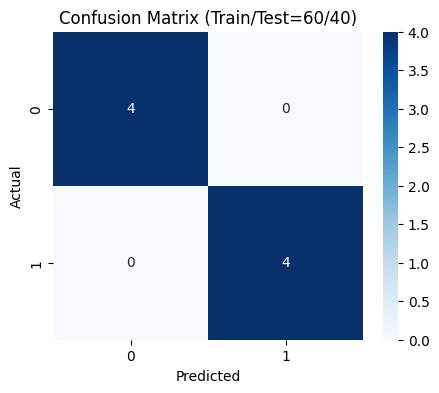


--- Train/Test Split: 70/30 ---
Confusion Matrix:
 [[3 0]
 [0 3]]
Accuracy: 1.0000
Cross-Entropy Loss: 0.3030


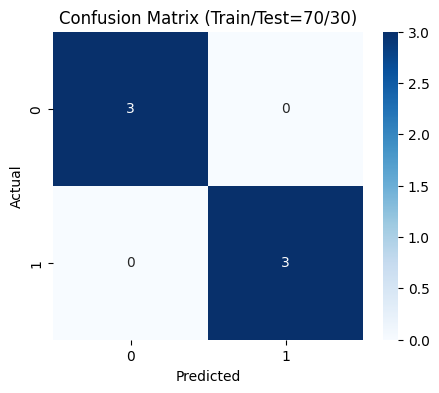


--- Train/Test Split: 80/19 ---
Confusion Matrix:
 [[2 0]
 [0 2]]
Accuracy: 1.0000
Cross-Entropy Loss: 0.2586


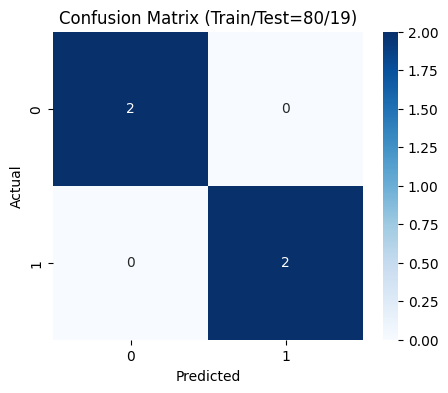


Random Forest 10-Fold CV Accuracy scores:
[1.  1.  0.5 1.  1.  0.5 0.5 0.5 1.  1. ]
Mean CV Accuracy: 0.8000 ± 0.2449


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 1. Upload CSV file
uploaded = files.upload()

# 2. Load dataset
df = pd.read_csv('rd_expenditure.csv')

# 3. Initial exploration
print("First 5 rows:\n", df.head())
print("\nDataset info:")
df.info()
print("\nSummary statistics:")
print(df.describe())

# 4. Feature engineering
df['Total_RD'] = df[['Business enterprise', 'Government', 'Higher education']].sum(axis=1)
median_total = df['Total_RD'].median()
df['High_RD'] = (df['Total_RD'] > median_total).astype(int)

# 5. Define features & target
features = ['Business enterprise', 'Government', 'Higher education']
X = df[features]
y = df['High_RD']

# 6. Handle missing values if any
X = X.fillna(X.median())

# 7. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Train/test splits and Logistic Regression training & evaluation
train_ratios = [0.6, 0.7, 0.8]

for ratio in train_ratios:
    print(f"\n--- Train/Test Split: {int(ratio*100)}/{int((1-ratio)*100)} ---")
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, train_size=ratio, stratify=y, random_state=42)

    model = LogisticRegression(max_iter=300)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    ce = log_loss(y_test, y_proba)

    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Cross-Entropy Loss: {ce:.4f}")

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Train/Test={int(ratio*100)}/{int((1-ratio)*100)})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 9. Random Forest with 10-fold Cross Validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_scaled, y, cv=skf, scoring='accuracy')

print("\nRandom Forest 10-Fold CV Accuracy scores:")
print(cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")